# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
for rows in soup.find('table').find_all('th'):
    print(rows.text)

id
terrestrial_date
sol
ls
month
min_temp
pressure


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list

# Loop through the scraped data to create a list of rows
rows =[]
for row in soup.find('table').find_all('th'):
    rows.append(row.text)




In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
temp_array =[[],[],[],[],[],[],[]]
count=0
for td in soup.find('table').find_all('td'):
    temp_array[count%7].append(td.text)
    count+=1
mars_df = pd.DataFrame({rows[i]:temp_array[i] for i in range(len(rows))})


In [8]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol']=pd.to_numeric(mars_df['sol'])
mars_df['ls'] = pd.to_numeric(mars_df['ls'])
mars_df['month'] = pd.to_numeric(mars_df['month'])
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'])
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'])


In [11]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_df.groupby("month").aggregate("count")['sol']

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: sol, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?
len(mars_df['sol'])

1867

In [14]:
# 3. What is the average low temperature by month?
mars_df.groupby("month").aggregate("mean")['min_temp']

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Temperature in Celsius'>

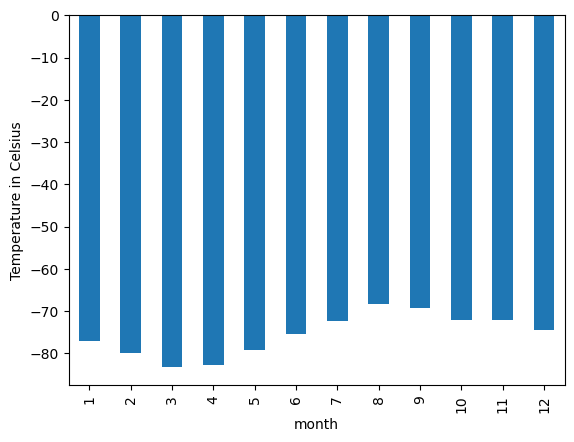

In [15]:
# Plot the average temperature by month
mars_df.groupby("month").aggregate("mean")['min_temp'].plot(kind='bar', ylabel="Temperature in Celsius")

<AxesSubplot:xlabel='month', ylabel='Temperature in Celsius'>

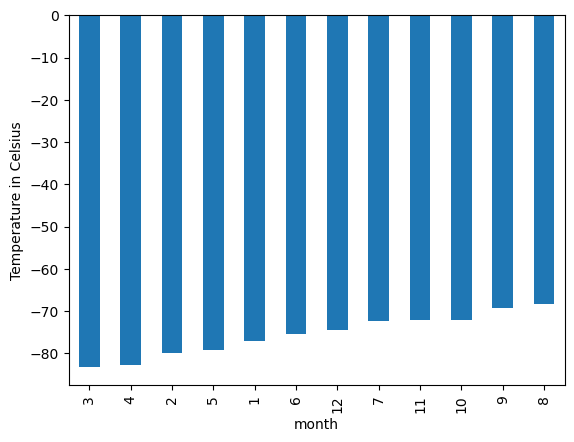

In [16]:
# Identify the coldest and hottest months in Curiosity's location
mars_df.groupby("month").aggregate("mean").sort_values("min_temp")['min_temp'].plot(kind='bar', ylabel="Temperature in Celsius")

In [17]:
# 4. Average pressure by Martian month
mars_df.groupby("month").aggregate("mean")["pressure"]

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Atmospheric Pressure'>

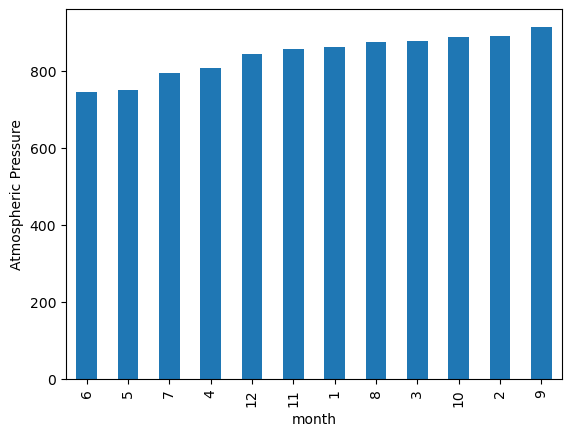

In [18]:
# Plot the average pressure by month
mars_df.groupby("month").aggregate("mean").sort_values("pressure")["pressure"].plot(kind='bar', ylabel= "Atmospheric Pressure")

<AxesSubplot:xlabel='Number of terrestrial days', ylabel='Mininum temperature'>

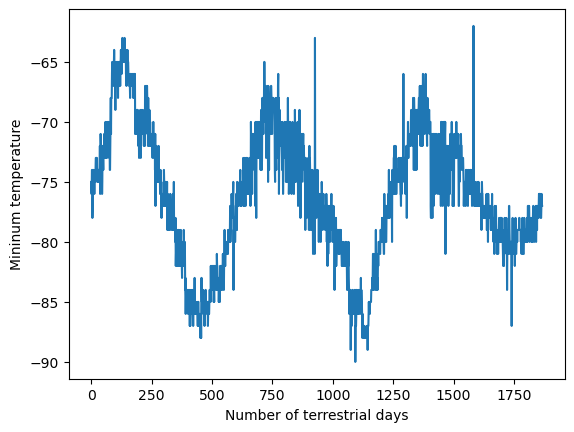

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df['min_temp'].plot(kind='line', xlabel = "Number of terrestrial days", ylabel = "Mininum temperature")

# Further Analysis

For most (if not all) things that follow a cyclical pattern, can be modelled as a sinusoidal function; a function of the form:

                 y = Asin(B(x -C))+D or y = Acos(B(x-C))+D

And as we can see from the graph, this data is no exception as it looks very sinusoidal. So in order to answer how many days are on mars, I decided to create a cosine model to help understand the cyclical nature of Mar's temperature and eventually figure out the original question (how many days make a year in Mars).

In [20]:
#Resetting index to be able to use index as days
mars_df = mars_df.reset_index()

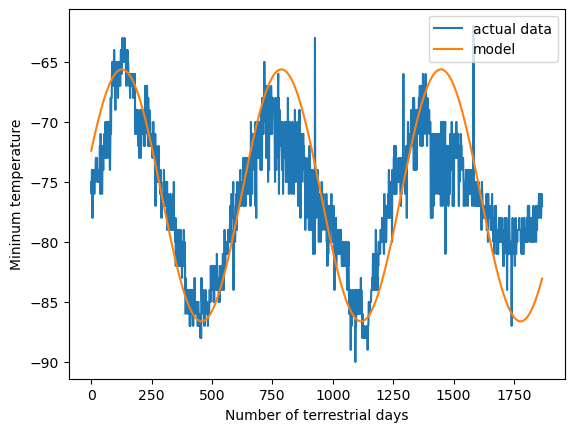

In [21]:
# first we figure out what points are the low points and the index those points occur
record_low=[]
record_high=[]

#After looking at the data, I figured -87 would be a good low point since it's the mode for the lowest temperatures 
#It's not the lowest but it occurs in the low temps the most 
record_low.append(mars_df.loc[mars_df['min_temp']==-87.0].head(12)['index'].mean())
record_low.append(mars_df.loc[mars_df['min_temp']==-87.0][12:29]['index'].mean())

#this is average distance between the lows: 674
avg_low = record_low[1]-record_low[0]

#Now for the same thing for the high temps which in this case is -66
record_high.append(mars_df.loc[mars_df['min_temp']==-66.0].head(27)['index'].mean())
record_high.append(mars_df.loc[mars_df['min_temp']==-66.0][27:28]['index'].mean())

#this is average distance between the highs: 646
avg_high =record_high[1]-record_high[0]

#the period (what would be the answer to the question) is the average of the highs and lows: 660
period =(0.5*(avg_high+avg_low))

#first instance of a high point. This will be the phase shift of our cosine function as cosine starts on top
phase_shift = int(record_high[0])


mars_df['min_temp'].plot(kind='line', xlabel = "Number of terrestrial days", ylabel = "Mininum temperature")
x = [i for i in range(len(mars_df['min_temp']))]

A = (-66+87)/2 #the amplitude of the cosine model
B= (2*np.pi)/period #B = 2pi/period
C= phase_shift #first instance of the high
D= mars_df['min_temp'].mean() #the midpoint of the graph. The vertical shift, the center

#put all together we get our model to be 
#y = 10.5cos(pi/330(x-127))-76.12
#where x is the index 
model= A*np.cos(B*(np.array(x)-C))+D 

#time to graph our model on the same graph as the data

plt.plot(x,model)
plt.legend(["actual data", "model"])
plt.show()

As we can see, the model is pretty close to the data, but how close? Let's compute the r-squared and the RMSE value to see just how similar

In [22]:
#Calculating r-squared between the sinusoidal model and the data given
def r_squared():
    sum_x =0
    sum_x2=0
    sum_y2=0
    sum_y =0
    sum_xy=0
    n =len(mars_df['min_temp'])
    for i in range(len(mars_df['min_temp'])):
        sum_x=sum_x+mars_df['min_temp'][i]
    for i in range(len(model)):
        sum_y=sum_y+model[i]
    for i in range(len(model)):
        sum_xy=sum_xy+model[i]*mars_df['min_temp'][i]
    for i in range(len(mars_df['min_temp'])):
        sum_x2=sum_x2+(mars_df['min_temp'][i]**2)
    for i in range(len(model)):
        sum_y2=sum_y2+(model[i]**2)

    r_squared = (n*sum_xy-(sum_x*sum_y))/(math.sqrt((n*sum_x2-(sum_x**2))*(n*sum_y2-(sum_y**2))))
    return r_squared

In [23]:
#Moment of truth
r_squared()

0.8716105537308074

In [24]:
rms = mean_squared_error(mars_df['min_temp'], model, squared=False)
rms

3.887691375045487

Now let's see what happens if we make the period the same as the internet claims (687) and compare the r-square value

In [25]:
B = 2*np.pi/687
model= A*np.cos(B*(np.array(x)-C))+D 

#The only thing that was changed was the period or amount of days in a year cycle

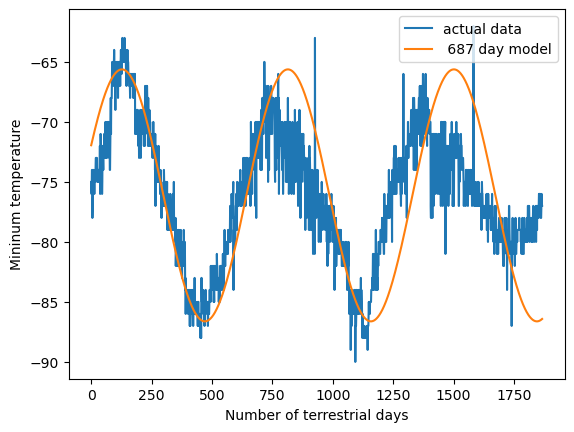

In [26]:
#Let's graph this with our data and then compare r-squared
mars_df['min_temp'].plot(kind='line', xlabel = "Number of terrestrial days", ylabel = "Mininum temperature")
plt.plot(x,model)
plt.legend(["actual data", " 687 day model"])
plt.show()

Not quite as smooth as the first, but don't let my bias persuade you, let's find out what the r-squared is now

In [27]:
#r-squared with 687 annual days
r_squared()

0.7965828106522889

In [28]:
#RMSE with 687 annual days
rms = mean_squared_error(mars_df['min_temp'], model, squared=False)
rms

4.601649472741708

Based off the graphs, r-squared and RMSE values, one could conclude that Mars has 660 days in a year, but we're working with limited data and only looking at temperatures to answer this question. However, 660 isn't to far off from the actual value of 687.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [31]:
# Write the data to a CSV
mars_df.to_csv("mars.csv")

In [32]:
browser.quit()